In [1]:
import os
import numpy as np
import scipy
import dedalus.public as d3
from dedalus.core import evaluator
import logging
from mpi4py import MPI
logger = logging.getLogger(__name__)
import math
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 9})
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import colormaps

In [7]:
v0 = np.loadtxt(os.getcwd()+"/field_outputs/background_velocity.txt")
B0 = np.loadtxt(os.getcwd()+"/field_outputs/background_magnetic.txt")
om_prime = np.loadtxt(os.getcwd()+"/field_outputs/velocity_perturbation.txt")
w0 = np.loadtxt(os.getcwd()+"/field_outputs/vorticity.txt")

rvec = np.loadtxt(os.getcwd()+"/field_outputs/radial_vector.txt")
theta = np.loadtxt(os.getcwd()+"/field_outputs/theta.txt")

In [48]:
M = -5.5
myM = (10e0)**M
Mag = myM
sMag = np.sqrt(Mag)


ri = 0.89
ro = 0.99

nHz = 2*np.pi * 1e-9
day = 3600 * 24
om0  = 466 * nHz * day
rsun    = 6.96e8

mu0 = 4 * np.pi
rho0 = 0.0309

U0 = (ro-ri) * rsun * om0/day
B0_Scale = sMag * np.sqrt(mu0*rho0) * U0

/tmp/ipykernel_3236016/6825015.py:64: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig("Testing.png", dpi=600)
/home/lc876/miniconda3/envs/dedalus/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/home/lc876/miniconda3/envs/dedalus/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


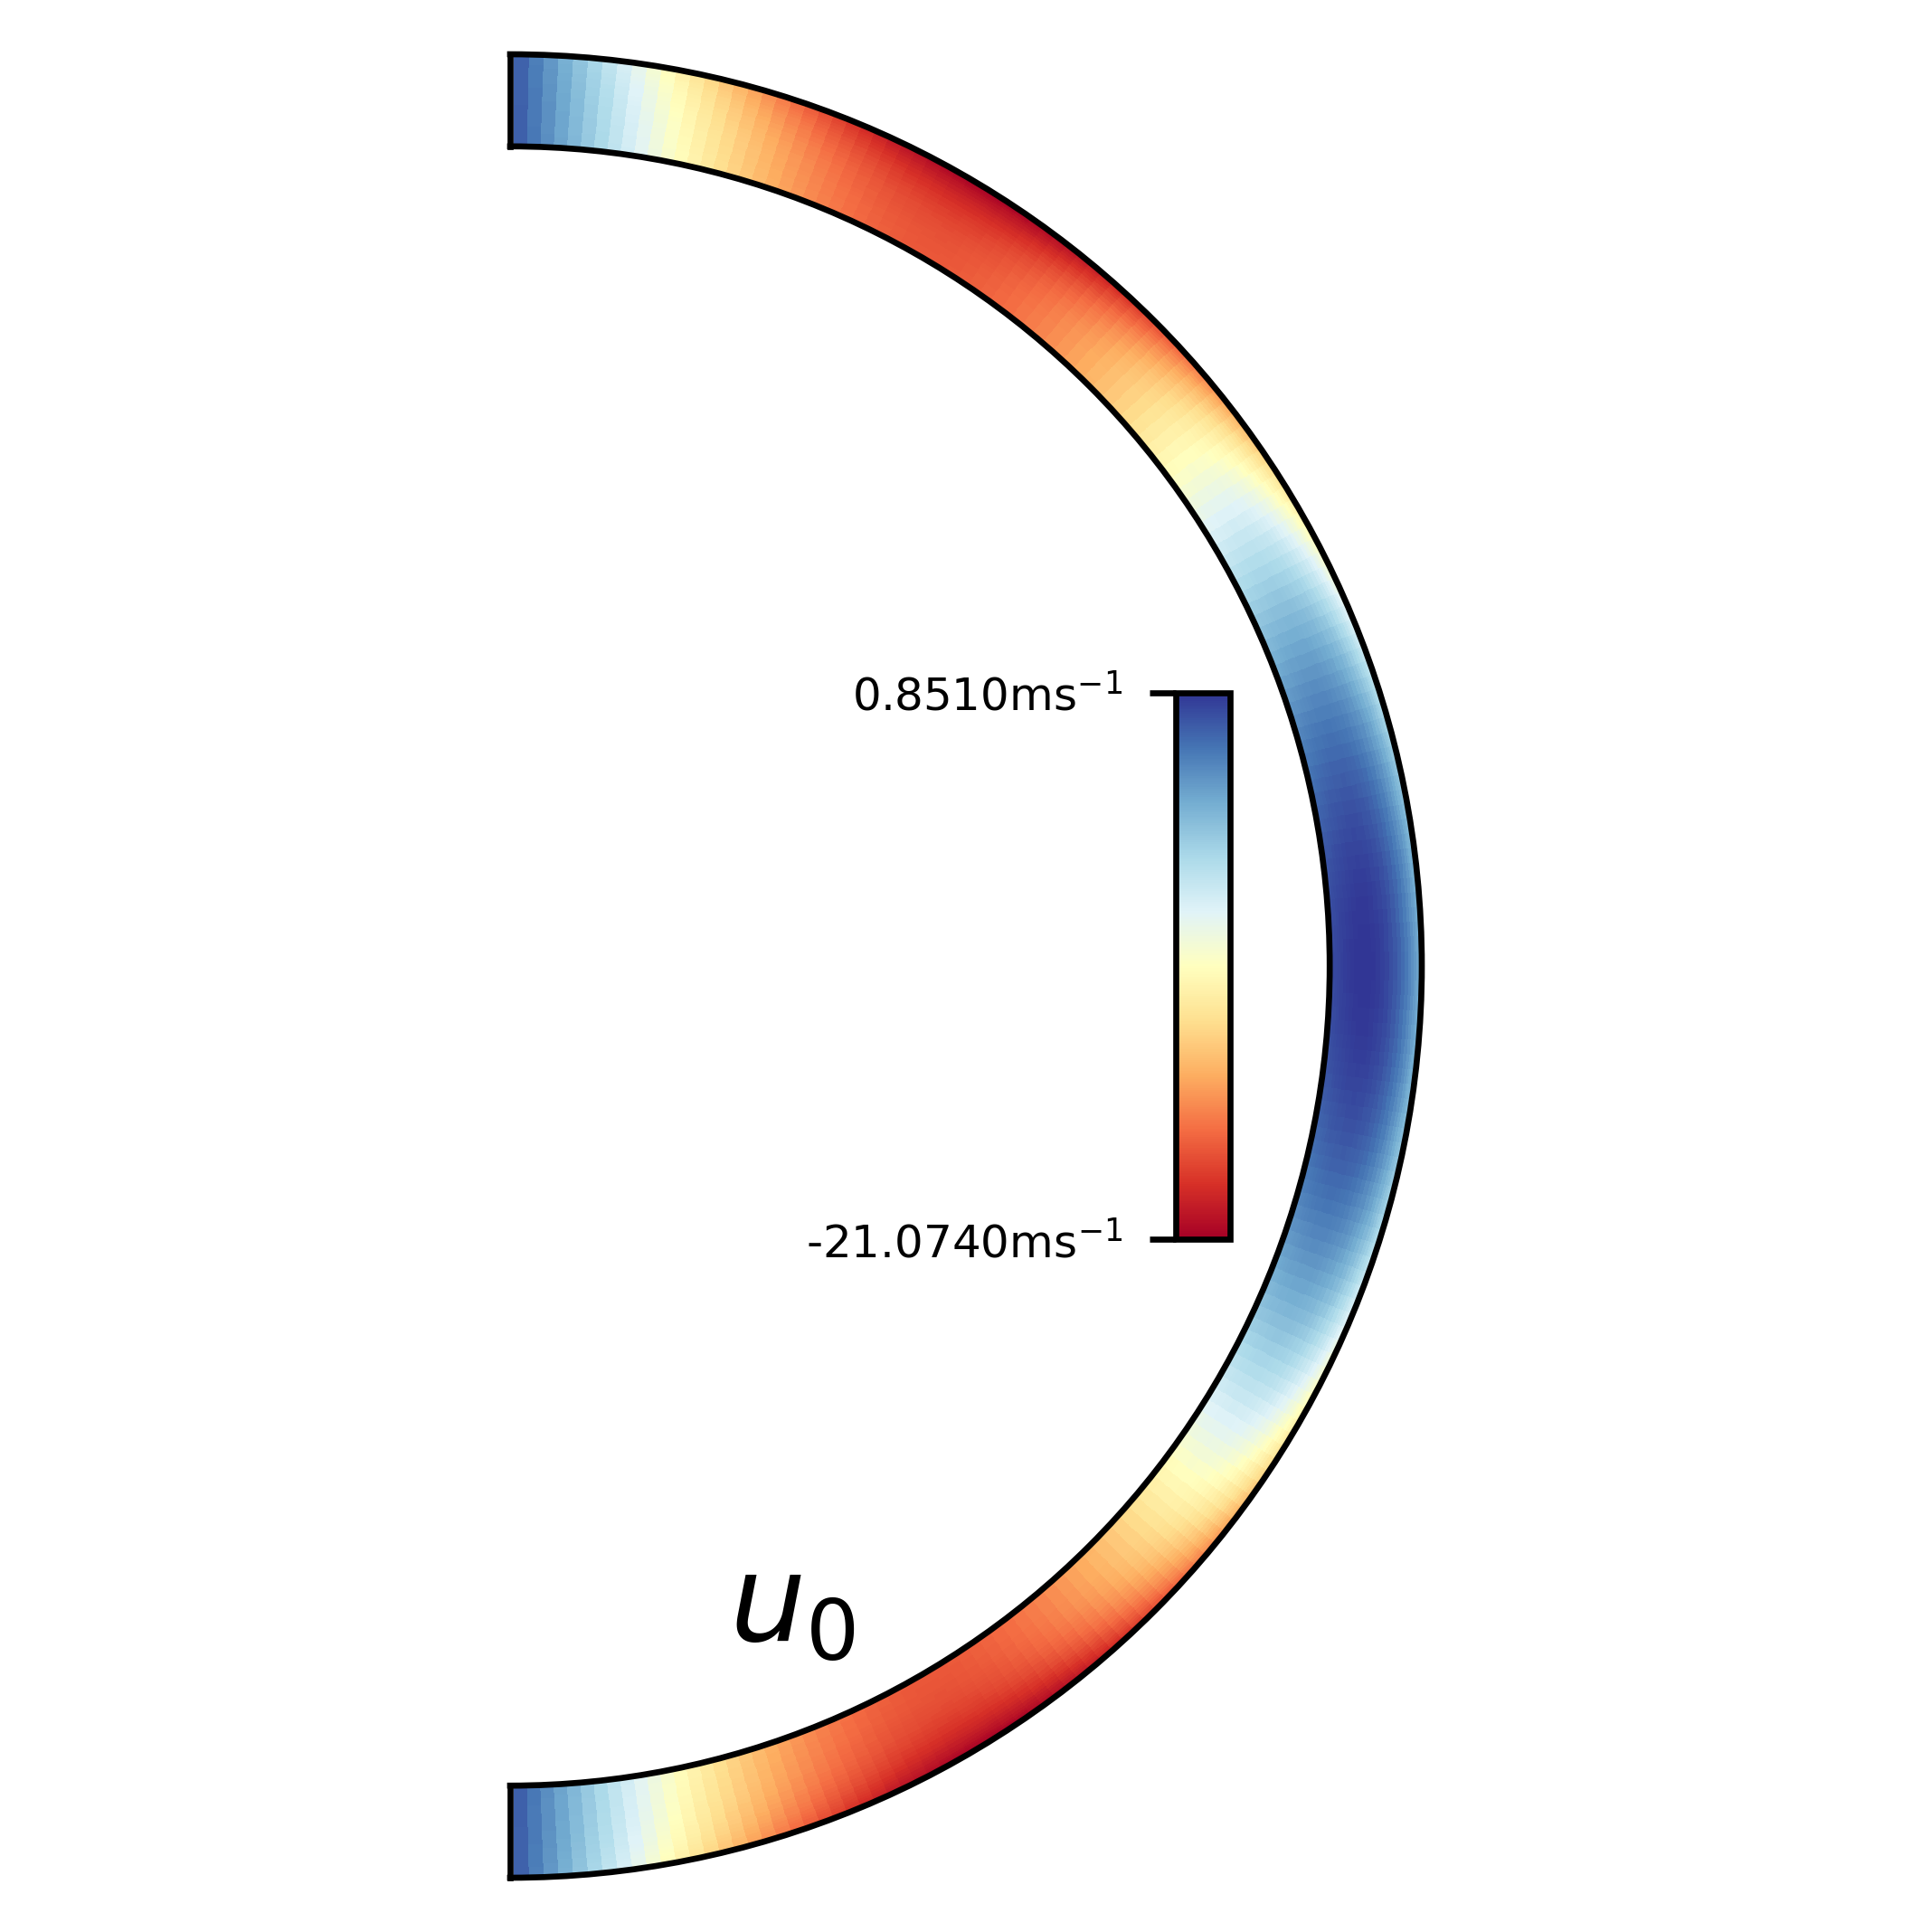

In [54]:
#Plots the colourmaps of data against the last 10% of the solar radius + latitude spanning from -pi to +pi
L0 = (ro-ri) * rsun
labels = [r"$u_{0}$",
            r'$B_{0}$',
            r"$\Omega'$",
            r'$w_{0}$',
            r'$\mathcal{H}$']

unit  = [r'$\mathrm{ms^{-1}}$',
            r'$\mathrm{T}$',
            r'$\mathrm{nHz}$',
            r'$\mathrm{s^{-1}}$']

def style(index,value):
        if labels[index] in [r'$\psi$', r'$a_{\phi}$', r'$\mathcal{H}$']:
            return '{:.4f}'.format(value) + unit[index]
        return '{:.4f}'.format(value) + unit[index]

fig = plt.figure(figsize=[7.3,3.5],constrained_layout=True,dpi=600)
x , y = np.meshgrid(theta, rvec)
cmaps = ['RdYlBu','RdYlGn','PRGn','PiYG']
datas = [v0*U0]#, B0, om_prime, w0]

i=0

pos = [ 0.15 * i - 0.265, 0.02, 0.92, 0.96 ]
pb = fig.add_axes(pos, projection='polar')
pb.set_xticklabels([])
pb.set_yticklabels([])
pb.set_xticks([])
pb.set_yticks([])

data = datas[i]
data2 = np.zeros((192, len(rvec)))

j = 0
for j in range(192):
    data2[j] = datas[i][j].real  

        


vmin = min(data2.flatten())
vmax = max(data2.flatten())
meplot = pb.pcolormesh(x, y, data2.T,
                        cmap = cmaps[i], vmin = vmin, vmax =  vmax,
                        rasterized =  False, shading    =  'auto')

pb.set_theta_direction(-1)
pb.set_theta_offset(np.pi/2)
pb.set_thetalim([np.pi,0])
pb.set_rlim(ri,ro)
pb.set_rorigin(0)
pb.set_aspect(1)
pb.grid(False)

cbax = inset_axes(pb, width = "3%", height = "30%", loc = 'center',
                        bbox_to_anchor = [0.13, 0, 1, 1], bbox_transform = pb.transAxes)
mycbar = fig.colorbar(meplot,cax=cbax,orientation='vertical',ticks=[vmin,vmax])
cbax.yaxis.set_ticks_position('left')
cbax.set_yticklabels( [style(i, vmin), style(i, vmax)], fontsize = 6 )
pb.text(0.37, 0.13, labels[i], transform = pb.transAxes,  fontsize = 16 )

fig.savefig("Testing.png", dpi=600)